In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
from lib.visualizer import hourly_profile_heatmap
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [19]:
df = query_table(table='vacuum_pump_1_30T')

In [3]:
df.shape

(2208, 2)

In [4]:
px.line(x=df.index, y=df.kw)

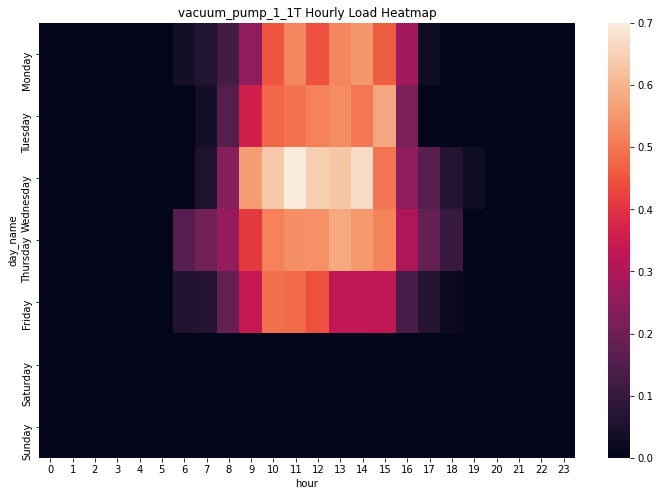

In [5]:
hourly_profile_heatmap(machine='vacuum_pump_1_1T')

In [22]:
df = df[(df.index >= '2017-11-05') & (df.index < '2017-12-09')]
time_int_range = np.arange(0, df.shape[0]*30, 30)
df['t_int'] = time_int_range
df['t_norm'] = (df['t_int'] - df['t_int'].min()) / (df['t_int'].max() - df['t_int'].min())

In [23]:
px.line(x=df.index, y=df.kw)

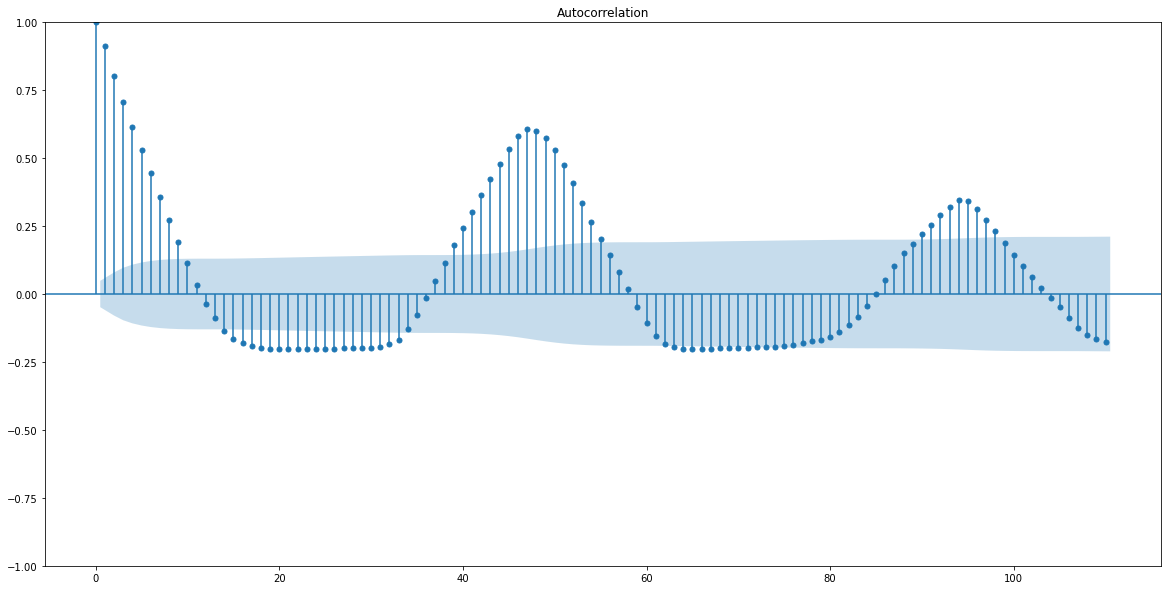

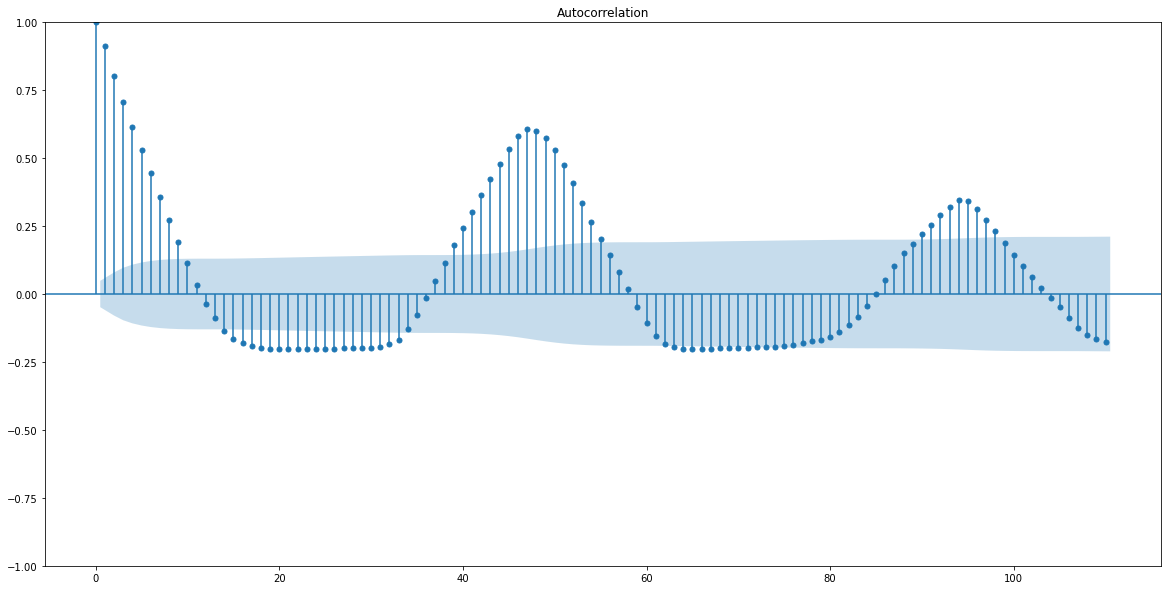

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=110, ax=ax)

In [27]:
df['t_norm'].iloc[94], df['t_norm'].iloc[98]

(0.05763335377069283, 0.060085836909871244)

In [28]:
# long 1
df['t_norm'].iloc[43], df['t_norm'].iloc[50]

(0.026364193746167996, 0.030656039239730228)

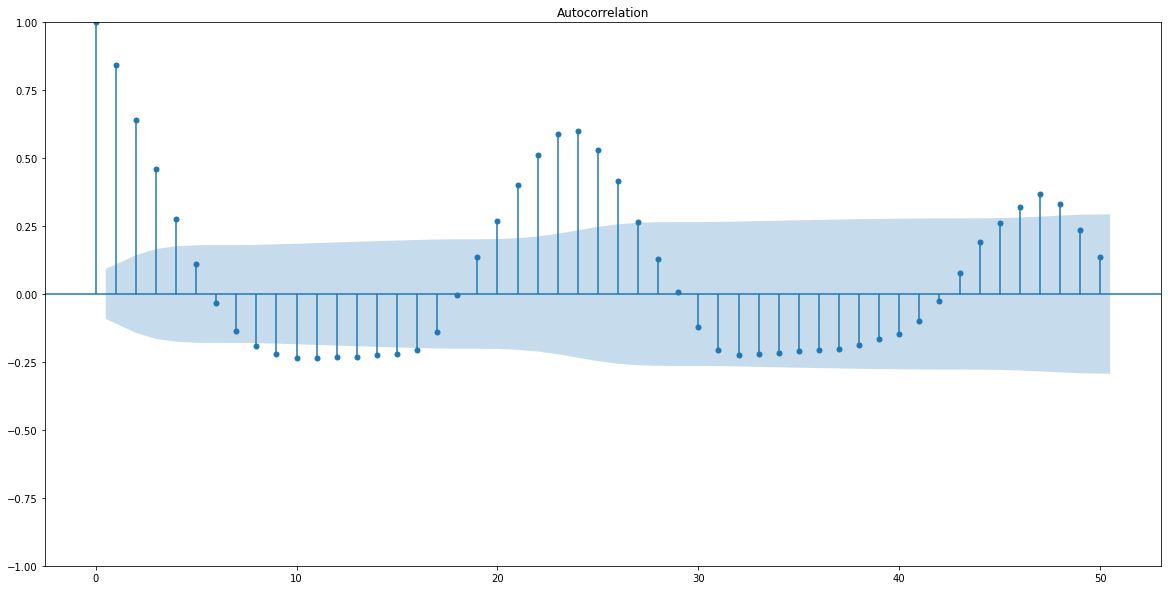

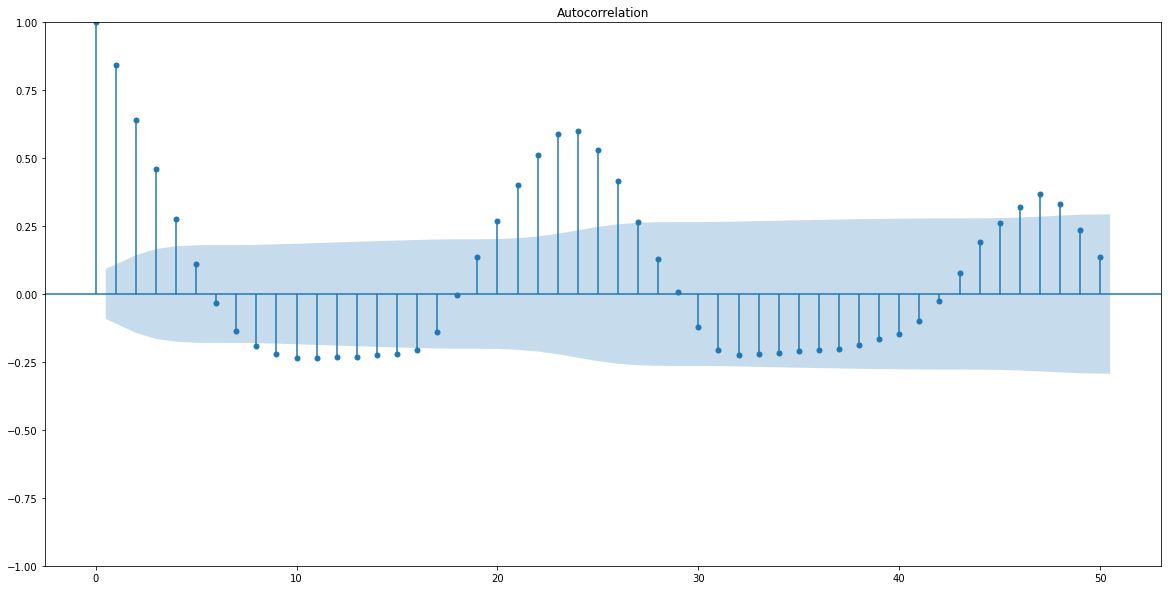

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=50, ax=ax)

In [12]:
# Short 1
df['t_norm'].iloc[8], df['t_norm'].iloc[14]

(0.017582417582417582, 0.03076923076923077)

In [14]:
# Short 2
df['t_norm'].iloc[22], df['t_norm'].iloc[26]

(0.04835164835164835, 0.05714285714285714)